In [1]:
import pandas as pd
import numpy as np
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import scipy.stats as ss
from sklearn.metrics import mean_squared_log_error
from scipy.stats import gaussian_kde

In [2]:
def plotSingle(tbl, label1, label2, sr, pr, rmsle, bias):
    
    fig, ax = plt.subplots()
        
    # Get x and y data 
    x = np.log10(tbl[label1])
    y = np.log10(tbl[label2])

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    ## actual plotting 
    f = ax.scatter(x, y, c=z, s=5)
    plt.plot(np.arange(-2, 6), np.arange(-2, 6), c='black', linestyle = '--')
    plt.colorbar(f)
    
    ## renaming axes
    x = [10.0**x for x in np.arange(-2, 6)]
    l = np.arange(-2, 6)
    ax.set_xticks(l)
    ax.set_xticklabels(x, rotation = 20)
    ax.set_yticks(l)
    ax.set_yticklabels(x)
    
    textstr = '\n'.join((
    r'$r=%.2f$' % (pr, ),
    r'$\rho=%.2f$' % (sr ),
    r'$RMSLE=%.2f$' % (rmsle, ),
    r'$Bias=%.2f$' % (bias, )))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

    #plt.show()
def statsF(tbl, label1, label2):
    bias = sum(tbl[label1] - tbl[label2]) / len(tbl)
    pr, pp = ss.pearsonr(tbl[label1], tbl[label2])
    sr, sp = ss.spearmanr(tbl[label1], tbl[label2])
    rmsle = np.sqrt(mean_squared_log_error(tbl[label1], tbl[label2]))
    return bias, pr, sr, rmsle
                    
def plotFull(tbl, label1, label2, sr, pr, rmsle, bias, axs, ax1, ax2):
        
    # Get x and y data 
    x = np.log10(tbl[label1])
    y = np.log10(tbl[label2])

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    ## actual plotting 
    f = axs[ax1, ax2].scatter(x, y, c=z, s=5)
    plt.plot(np.arange(-2, 6), np.arange(-2, 6), c='black', linestyle = '--')
    plt.colorbar(f)
    
    
    textstr = '\n'.join((
    r'$r=%.2f$' % (pr, ),
    r'$\rho=%.2f$' % (sr ),
    r'$RMSLE=%.2f$' % (rmsle, ),
    r'$Bias=%.2f$' % (bias, )))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    axs[ax1, ax2].text(0.05, 0.95, textstr, fontsize=10, verticalalignment='top', bbox=props)

    plt.show()

In [3]:
true = [pd.read_csv('/mnt/d/exome/simulation_study/backgroundSelection/simple/treeFiles/simple_selection_true.txt', sep = '\t'), pd.read_csv('/mnt/d/exome/simulation_study/backgroundSelection/complex/treeFiles/complex_selection_true.txt', sep = '\t')]

wes, simple


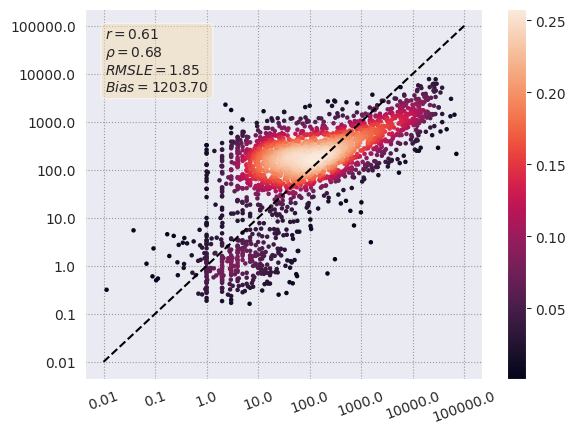

wgs, simple


<Figure size 640x480 with 0 Axes>

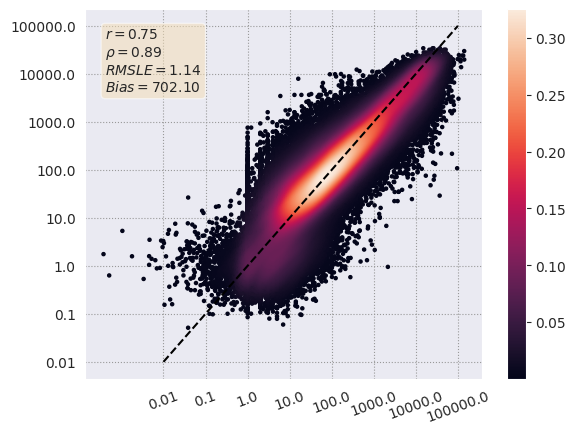

wes, complex


<Figure size 640x480 with 0 Axes>

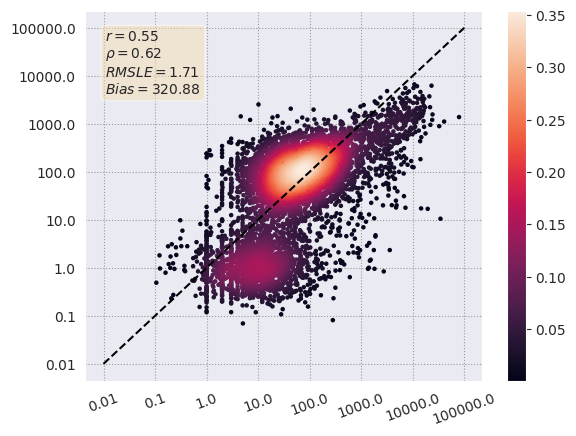

wgs, complex


<Figure size 640x480 with 0 Axes>

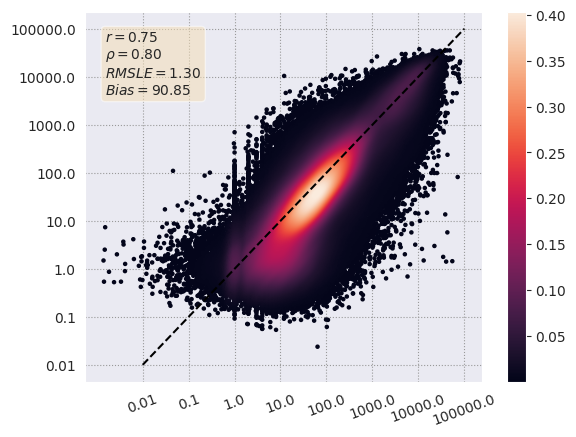

<Figure size 640x480 with 0 Axes>

In [4]:
for i, model in enumerate(['simple', 'complex']):
    tmodel = true[i]
    for j, typ in enumerate(['wes', 'wgs']):
        rel = pd.read_csv('/mnt/d/exome/results/BS/bs_{}_{}/chr22_{}_{}_selection.mut'.format(typ, model, typ, model), sep = ';')
        relM = rel.merge(tmodel, left_on = 'pos_of_snp', right_on ='position').drop_duplicates()
        relM.loc[:, 'relAge'] = relM[['age_begin', 'age_end']].mean(axis=1)
        relF = relM[relM['relAge'] > 0]
        relF = relF[relF['mutationTime'] > 0]
        relF.reset_index(inplace = True)

        bias, pr, sr, rmsle = statsF(relF, 'mutationTime', 'relAge')
        print('{}, {}'.format(typ, model))
        plotSingle(relF, 'mutationTime', 'relAge', sr, pr, rmsle, bias)
        plt.show()
        #plt.savefig('/mnt/d/exome/results/figures/{}_{}_bs.jpg'.format(model, typ))
        plt.clf()
